In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [16]:
test_values = pd.read_csv('data/test_values.csv')
train_values = pd.read_csv('data/train_values.csv')
train_labels = pd.read_csv('data/train_labels.csv')

test_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


add columns for thallium stress test results. 

In [17]:
test_values['thal_reversible'] = test_values.thal.apply(lambda x: 1 if x == 'reversible_defect' else 0)
test_values['thal_normal'] = test_values.thal.apply(lambda x: 1 if x == 'normal' else 0)
train_values['thal_reversible'] = train_values.thal.apply(lambda x: 1 if x == 'reversible_defect' else 0)
train_values['thal_normal'] = train_values.thal.apply(lambda x: 1 if x == 'normal' else 0)


In [18]:
X = train_values[['slope_of_peak_exercise_st_segment',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'thal_reversible',
       'thal_normal']]

y = test_values[['slope_of_peak_exercise_st_segment',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'thal_reversible',
       'thal_normal']]


In [19]:
model = LogisticRegression()
model.fit(X, train_labels['heart_disease_present'])
model.score(X, train_labels['heart_disease_present'])

0.8777777777777778

In [6]:
y_labels = model.predict(y)

In [7]:
test_labels = test_values
test_labels['heart_disease_present'] = y_labels
test_labels = test_labels[['patient_id', 'heart_disease_present']]

In [8]:
test_labels.head()

,patient_id,heart_disease_present
0,olalu7,0
1,z9n6mx,0
2,5k4413,1
3,mrg7q5,0
4,uki4do,1


In [9]:
# final submission needs be in float format
test_labels['heart_disease_present'] = test_labels['heart_disease_present'].astype(float)
test_labels.to_csv('submission.csv', index = False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## First Submission scored 5.62273

In [97]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [88]:
model = LogisticRegression(random_state=42)
model.fit(X, train_labels['heart_disease_present'])
model.score(X, train_labels['heart_disease_present'])

0.8444444444444444

In [54]:
# what happens when we normalize?
X=((X-X.min())/(X.max()-X.min()))*20
y=((y-y.min())/(y.max()-y.min()))*20
model = LogisticRegression()
model.fit(X, train_labels['heart_disease_present'])
model.score(X, train_labels['heart_disease_present'])

0.8611111111111112

In [55]:
labels = model.predict(X)

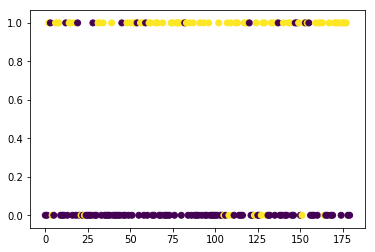

In [63]:
plt.scatter(np.arange(0,len(X)), train_labels.heart_disease_present, c = labels)


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'Explained Variance (%)')

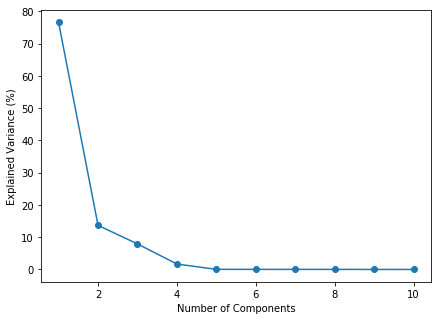

In [42]:
projected = pca.fit_transform(X)
ig = plt.figure(figsize = (7,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')

In [68]:
X['pca_1'] = projected[:,0]
X['pca_2'] = projected[:,1]
model = LogisticRegression()
model.fit(X, train_labels['heart_disease_present'])
model.score(X, train_labels['heart_disease_present'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.8444444444444444

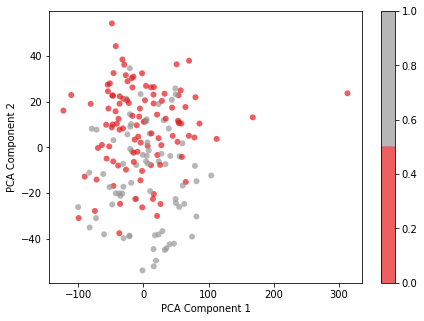

In [47]:
fig = plt.figure(figsize = (7,5))

plt.scatter(projected[:,0], projected[:,1],
           c = labels, edgecolor = 'none', alpha = .7,
           cmap = plt.cm.get_cmap('Set1', 2))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

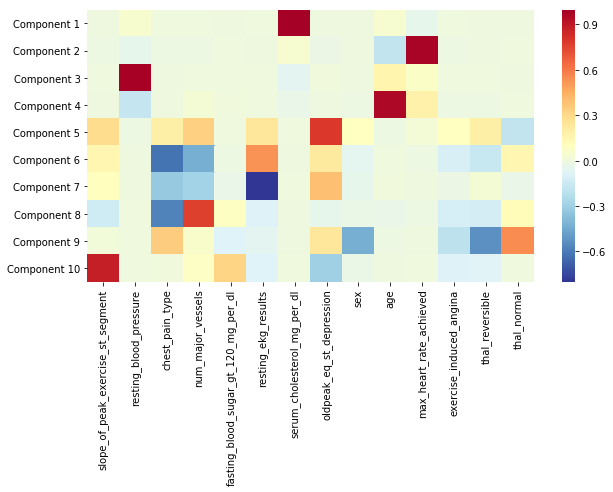

In [49]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = pca.components_, cmap = 'RdYlBu_r', xticklabels = X.columns,
           yticklabels = ['Component {}'.format(i) for i in range(1,11)])

In [99]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, train_labels['heart_disease_present'])
regr_2.fit(X, train_labels['heart_disease_present'])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [100]:
regr_1.predict(y)

array([0.46428571, 0.17021277, 0.87037037, 0.17021277, 0.17021277,
       0.17021277, 0.17021277, 0.46428571, 0.17021277, 0.17021277,
       0.17021277, 0.46428571, 0.17021277, 0.87037037, 0.17021277,
       0.17021277, 0.17021277, 1.        , 0.46428571, 0.17021277,
       0.87037037, 0.17021277, 0.17021277, 0.17021277, 0.87037037,
       0.87037037, 0.46428571, 0.17021277, 0.17021277, 0.17021277,
       0.87037037, 0.46428571, 0.87037037, 0.17021277, 0.17021277,
       0.17021277, 0.17021277, 0.17021277, 0.46428571, 0.17021277,
       0.87037037, 0.46428571, 0.87037037, 0.17021277, 0.87037037,
       0.17021277, 0.17021277, 0.17021277, 0.17021277, 0.17021277,
       0.17021277, 0.17021277, 0.87037037, 0.17021277, 0.46428571,
       0.17021277, 0.46428571, 0.17021277, 0.17021277, 0.87037037,
       0.17021277, 0.87037037, 0.17021277, 0.17021277, 0.17021277,
       0.17021277, 0.17021277, 0.87037037, 0.87037037, 1.        ,
       0.17021277, 0.87037037, 0.87037037, 0.87037037, 0.87037